# Baseball Overview
### Author: Ryan Berns

---
## I. Pythagorean Thereom of Baseball
* Relates the number of runs a team has scored and surrendered to its actual winning percentage
* <font color='004d99'>**Bill James**</font> (the father of sabermetrics) developed this metric with the thought that the team's win-loss record should approach their run differential (and not the other way around)

![Bill James](https://www.thevideoanalyst.com/wp-content/uploads/2010/10/bill_james.jpg)
Percentage of Games Won = $\frac{R^2}{R^2 + RA^2}$

*Source: https://www.baseball-reference.com/bullpen/Pythagorean_Theorem_of_Baseball *

**Data**
https://github.com/chadwickbureau/baseballdatabank

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
# Read in data from github
teams = pd.read_csv('https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv',sep=',')

In [2]:
# Take all data after 1950 (1950 was a completely arbitrary cutoff.  this can be modified later)
teams1950 = teams.loc[teams.yearID > 1950]

In [3]:
teams1950.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1199,1951,AL,BOS,BOS,NaN,3,154,75.0,87,67,NaN,NaN,N,N,804,5378,1428,233,32,127,756.0,594.0,20.0,21.0,NaN,NaN,725,644,4.14,46,7,24,4197,1413,100,599,658,138,184,0.977,Boston Red Sox,Fenway Park II,1312282.0,110,109,BOS,BOS,BOS
1200,1951,NL,BRO,LAD,NaN,2,158,78.0,97,60,NaN,NaN,N,N,855,5492,1511,249,37,184,603.0,649.0,89.0,70.0,NaN,NaN,672,613,3.88,64,10,13,4269,1360,150,549,693,128,192,0.979,Brooklyn Dodgers,Ebbets Field,1282628.0,102,99,BRO,BRO,BRO
1201,1951,NL,BSN,ATL,NaN,4,155,78.0,76,78,NaN,NaN,N,N,723,5293,1385,234,37,130,565.0,617.0,80.0,34.0,NaN,NaN,662,579,3.75,73,16,12,4167,1378,96,595,604,145,157,0.976,Boston Braves,Braves Field,487475.0,93,93,BSN,BSN,BSN
1202,1951,AL,CHA,CHW,NaN,4,155,78.0,81,73,NaN,NaN,N,N,714,5378,1453,229,64,86,596.0,524.0,99.0,70.0,NaN,NaN,644,551,3.50,74,11,14,4254,1353,109,549,572,151,176,0.975,Chicago White Sox,Comiskey Park,1328234.0,98,98,CHW,CHA,CHA
1203,1951,NL,CHN,CHC,NaN,8,155,77.0,62,92,NaN,NaN,N,N,614,5307,1327,200,47,103,477.0,647.0,63.0,30.0,NaN,NaN,750,668,4.34,48,10,10,4155,1416,125,572,544,181,161,0.971,Chicago Cubs,Wrigley Field,894415.0,102,104,CHC,CHN,CHN


In [4]:
# Create a pythag column called "pcntGamesWon"
teams1950 = teams1950.assign(pcntGamesWon=(teams1950.R**2/(teams1950.R**2 + teams1950.RA**2)))

In [5]:
# Convert pythag to estimated games by multiplying by the games in that season
teams1950 = teams1950.assign(estGamesWon=round((teams1950.pcntGamesWon*teams1950.G),0))

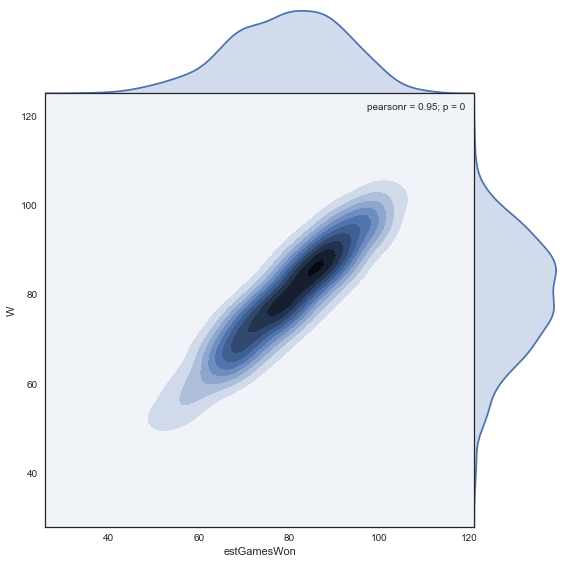

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(style="white")

# Show the joint distribution using kernel density estimation
ax = sns.jointplot(teams1950.estGamesWon, teams1950.W, kind="kde", size=8, space=0)

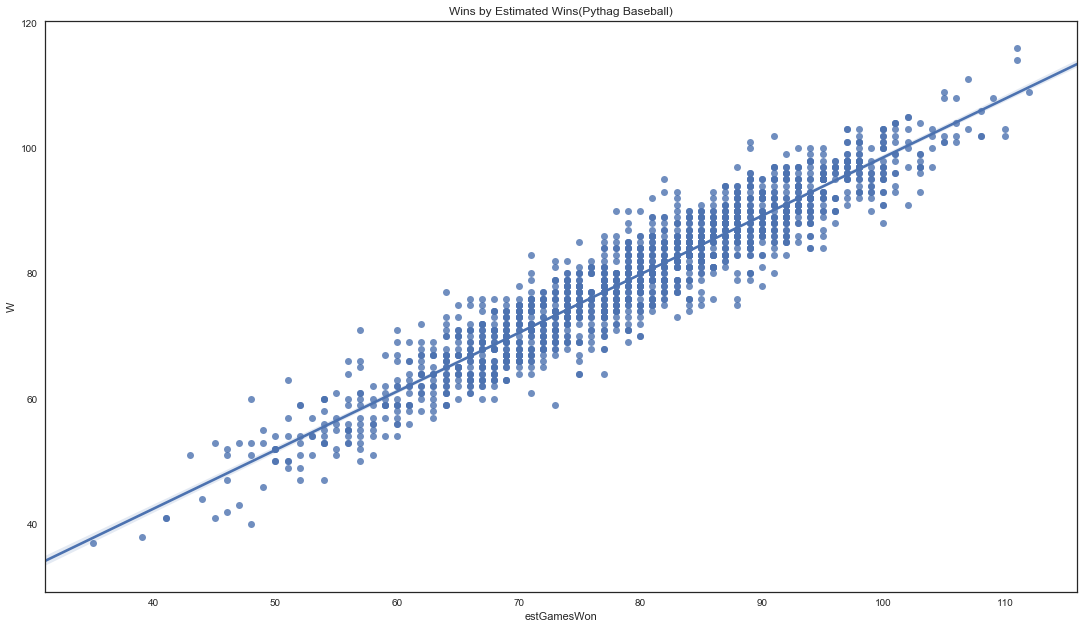

In [7]:
# Show sam relationship using regression plot
g= sns.regplot(x=teams1950.estGamesWon, y=teams1950.W).set_title("Wins by Estimated Wins(Pythag Baseball)")
g.figure.set_size_inches(18.5, 10.5)


* Actual wins and estimated games won (using baseball's pythag theorem') is highly correlated (0.95 pearson correlation coefficient)
    * **At the end of the day, this makes sense right?**
        * The team with the most runs win a game.  
        * A team's ability to limit runs against also obviously increases the odds of winning each game.
    * **Why does this matter?**
        * Now, we have a metric we can measure at a per player level (runs scored, runs batted in, etc.).  
        * Nuanced measurements will do a better job than just runs though.  Runs are a product of not only how well a single player plays but how well his team is at hitting to drive him in.

In [8]:
# Create a "residual".  Actual wins subtracted by estimated games won
teams1950 = teams1950.assign(Wdifferential=(teams1950.W - teams1950.estGamesWon))

#### The "luckiest" teams in the MLB since 1950

By identifying the largest difference between the estimated wins and actual, you are able to identify the "luckiest" seasons since 1951

In [9]:
# Luckiest Teams
teams1950[['yearID','franchID','Rank','W','L','estGamesWon','Wdifferential']].sort_values(by='Wdifferential',ascending=False).head()

,yearID,franchID,Rank,W,L,estGamesWon,Wdifferential
2857,2017,SDP,4,71,91,57.0,14.0
2475,2005,ARI,2,77,85,64.0,13.0
2832,2016,TEX,1,95,67,82.0,13.0
2463,2004,NYY,1,101,61,89.0,12.0
1907,1984,NYM,2,90,72,78.0,12.0


<h4> The "<font color='red'>un</font>luckiest" teams in the MLB since 1950</h4>

By identifying the largest *negative* difference between the estimated wins and actual, you are able to identify the teams that did not have luck on their side...

In [10]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [11]:
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.min()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [12]:
# Unluckiest Teams
unlucky = teams1950[['yearID','teamID','Rank','W','L','estGamesWon','Wdifferential']].sort_values(by='Wdifferential',ascending=True).head().set_index(["yearID","teamID"])
# unlucky.style.bar(subset=['W'],align='mid',color='#28a056')
unlucky.style.apply(highlight_min, subset=['W'])


,,Rank,W,L,estGamesWon,Wdifferential
yearID,teamID,,,,,
1993,NYN,7,59,103,73,-14
1984,PIT,6,75,87,88,-13
1986,PIT,6,64,98,77,-13
2014,OAK,2,88,74,100,-12
1967,BAL,6,76,85,88,-12


<img src=https://www.mlbstatic.com/mlb.com/builds/site-core/b1f0c226cb2df26dc50e85bcfe2e270ff5457aff_1525816315/images/logos/team-primary-on-dark/121.svg?cb=1460125744 width="125" align=left>
<h1><font color='red'>ALERT!!</font></h1><br>

Of course my beloved Mets would rank #1 for unluckiest season in the past 60+ years...  The '93 Mets were horrendous losing over 103 games.  Bad luck meant they lost 103 games instead of 89.  Either way, you might want to block that season from memory...

In [13]:
batting = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [14]:
players = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [15]:
unLuckyMets = batting.loc[((batting.teamID=="NYN") & (batting.yearID==1993)),:]

In [16]:
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


We have our unlucky Mets from 1993 but lets join it all together so we can see who played well and who didn't in '93

In [17]:
unLuckyMetsP = pd.merge(unLuckyMets,players,left_on="playerID",right_on="playerID",how='inner')

Maybe like me, you forget that Eddie Murray was on the Mets in 1993.  Although he did put up 27 dingers, he must have been towards the end of his career, right? We will create the player's age based on their birth year from the players data.

In [18]:
unLuckyMetsP = unLuckyMetsP.assign(age = (unLuckyMetsP.yearID - unLuckyMetsP.birthYear))

We have most of the data we need but we don't have batting average.  Let's add batting average to our dataset.  Batting average is the most common baseball metric which many passive fans also understand. As a refresher, batting average is just the proportion of at bats a player has that results in a hit.

$Batting Average = \frac{Hits}{At Bats}$

In [19]:
# Calculate Batting average
unLuckyMetsP = unLuckyMetsP.assign(BA = round((unLuckyMetsP.H/unLuckyMetsP.AB),3))
# unLuckyMetsP.loc[unLuckyMetsP['AB'] >=100,['nameFirst','nameLast','age','bats','throws','BA','G','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SF','GIDP']]\
#             .sort_values('BA',ascending=False)

Striking out is also not a desired action. Let's see what portion of at bats resulted in a strikeout for each player on the '93 Mets.

$K percentage = \frac{SO}{At Bats}$

In [20]:
# Strikeout Percentage
unLuckyMetsP = unLuckyMetsP.assign(Kpcnt = round((unLuckyMetsP.SO/unLuckyMetsP.AB),3))
unLuckyMetsP.loc[unLuckyMetsP['AB'] >=100,['nameFirst','nameLast','age','bats','throws','BA','G','AB','SO','Kpcnt']]\
            .sort_values('Kpcnt',ascending=False)

,nameFirst,nameLast,age,bats,throws,BA,G,AB,SO,Kpcnt
37,Ryan,Thompson,26.0,R,R,0.250,80,288,81.0,0.281
3,Jeromy,Burnitz,24.0,L,R,0.243,86,263,66.0,0.251
2,Bobby,Bonilla,30.0,B,R,0.265,139,502,96.0,0.191
27,Jeff,McKnight,30.0,B,R,0.256,105,164,31.0,0.189
20,Howard,Johnson,33.0,B,R,0.238,72,235,43.0,0.183
23,Jeff,Kent,25.0,R,R,0.270,140,496,88.0,0.177
4,Vince,Coleman,32.0,B,R,0.279,92,373,58.0,0.155
16,Todd,Hundley,24.0,B,R,0.228,130,417,62.0,0.149
1,Tim,Bogar,27.0,R,R,0.244,78,205,29.0,0.141
38,Chico,Walker,35.0,B,R,0.225,115,213,29.0,0.136


In [29]:
unLuckyMetsP.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,age,BA,Kpcnt
0,baezke01,1993,1,NYN,NL,52,126,10,23,9,0,0,7.0,0.0,0.0,13,17.0,1.0,0.0,4.0,0.0,1.0,1967.0,1.0,10.0,USA,NY,Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,Kevin,Baez,Kevin Richard,160.0,72.0,R,R,1990-09-03,1993-10-03,baezk001,baezke01,26.0,0.183,0.135
1,bogarti01,1993,1,NYN,NL,78,205,19,50,13,0,3,25.0,0.0,1.0,14,29.0,2.0,3.0,1.0,1.0,2.0,1966.0,10.0,28.0,USA,IN,Indianapolis,NaN,NaN,NaN,NaN,NaN,NaN,Tim,Bogar,Timothy Paul,198.0,74.0,R,R,1993-04-21,2001-07-01,bogat001,bogarti01,27.0,0.244,0.141
2,bonilbo01,1993,1,NYN,NL,139,502,81,133,21,3,34,87.0,3.0,3.0,72,96.0,11.0,0.0,0.0,8.0,12.0,1963.0,2.0,23.0,USA,NY,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,Bobby,Bonilla,Roberto Martin Antonio,210.0,75.0,B,R,1986-04-09,2001-10-07,bonib001,bonilbo01,30.0,0.265,0.191
3,burnije01,1993,1,NYN,NL,86,263,49,64,10,6,13,38.0,3.0,6.0,38,66.0,4.0,1.0,2.0,2.0,2.0,1969.0,4.0,15.0,USA,CA,Westminster,NaN,NaN,NaN,NaN,NaN,NaN,Jeromy,Burnitz,Jeromy Neal,190.0,72.0,L,R,1993-06-21,2006-09-27,burnj001,burnije01,24.0,0.243,0.251
4,colemvi01,1993,1,NYN,NL,92,373,64,104,14,8,2,25.0,38.0,13.0,21,58.0,1.0,0.0,3.0,2.0,2.0,1961.0,9.0,22.0,USA,FL,Jacksonville,NaN,NaN,NaN,NaN,NaN,NaN,Vince,Coleman,Vincent Maurice,170.0,72.0,B,R,1985-04-18,1997-04-14,colev001,colemvi01,32.0,0.279,0.155


In [21]:
%load_ext rpy2.ipython

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
%R require(ggplot2); require(tidyr)

array([1], dtype=int32)

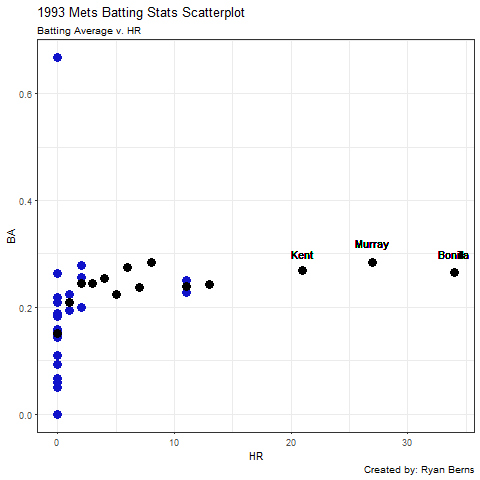

In [63]:
%%R -i unLuckyMetsP
unLuckyMetsP %>% 
#   gather("bats", "BA") %>%
  ggplot(aes(x = HR, y = BA, label=factor(nameLast))) +
    geom_point(size=4,color='#1013c9') +
    stat_summary(fun.y=mean, color='black', geom='point', size = 4) +
    labs(title = "1993 Mets Batting Stats Scatterplot",
         subtitle = "Batting Average v. HR",
         captions = "Created by: Ryan Berns") +
#     geom_text(hjust=1, vjust=-1) +
    geom_text(x=21, y=0.3, label="Kent") +
    geom_text(x=27, y=0.32, label="Murray") +
    geom_text(x=34, y=0.3, label="Bonilla") +
    theme_bw()